In [1]:
#Import keras library
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
#Import numpy library
import numpy as np
#Import matplotlib library
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#Import dataset
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
#Convert values into float type
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
#Create a validation set
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]
#Understand dimensions
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 8s 0us/step
(45000, 32, 32, 3) (45000, 1)
(5000, 32, 32, 3) (5000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
#Normalize data by substracting the mean, dividing by standard deviation plus an small number
mean = np.mean(x_train, axis=(0,1,2,3))
std = np.std(x_train, axis=(0,1,2,3))
x_train = (x_train - mean)/(std+1e-7)
x_valid = (x_valid - mean)/(std+1e-7)
x_test = (x_test - mean)/(std+1e-7)

In [4]:
#One-hot encode the classes
y_train = np_utils.to_categorical(y_train,10)
y_valid = np_utils.to_categorical(y_valid,10)
y_test = np_utils.to_categorical(y_test,10)
print(y_train.shape,y_valid.shape,y_test.shape)

In [5]:
#Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(x_train)

In [6]:
model = Sequential()
#Conv1
model.add(Conv2D(32,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(1e-4),input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
#Conv2
model.add(Conv2D(32,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#Pool + dropout
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Conv3
model.add(Conv2D(64,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#Conv4
model.add(Conv2D(64,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#Pool + dropout
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#Conv5
model.add(Conv2D(128,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#Conv6
model.add(Conv2D(128,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#Pool + dropout
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#Flatten and add dense layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)       

In [7]:
checkpointer = ModelCheckpoint(filepath='model.100epochs.hdf5',verbose=1,save_best_only=True)
optimizer=keras.optimizers.adam(learning_rate=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=128),callbacks=[checkpointer],steps_per_epoch=x_train.shape[0]//128,epochs=125,verbose=2,validation_data=(x_valid,y_valid))

Epoch 1/125
 - 31s - loss: 2.8462 - accuracy: 0.2648 - val_loss: 1.9922 - val_accuracy: 0.3136

Epoch 00001: val_loss improved from inf to 1.99222, saving model to model.100epochs.hdf5
Epoch 2/125
 - 22s - loss: 2.1216 - accuracy: 0.3471 - val_loss: 1.5617 - val_accuracy: 0.4752

Epoch 00002: val_loss improved from 1.99222 to 1.56167, saving model to model.100epochs.hdf5
Epoch 3/125
 - 22s - loss: 1.8950 - accuracy: 0.3963 - val_loss: 1.4296 - val_accuracy: 0.5086

Epoch 00003: val_loss improved from 1.56167 to 1.42955, saving model to model.100epochs.hdf5
Epoch 4/125
 - 23s - loss: 1.7469 - accuracy: 0.4323 - val_loss: 1.4398 - val_accuracy: 0.5088

Epoch 00004: val_loss did not improve from 1.42955
Epoch 5/125
 - 22s - loss: 1.6546 - accuracy: 0.4625 - val_loss: 1.4120 - val_accuracy: 0.5138

Epoch 00005: val_loss improved from 1.42955 to 1.41204, saving model to model.100epochs.hdf5
Epoch 6/125
 - 22s - loss: 1.5667 - accuracy: 0.4878 - val_loss: 1.3978 - val_accuracy: 0.5242

Epoch

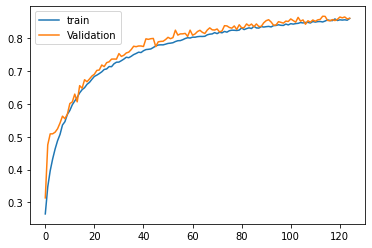

In [13]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()